# Covid test and Stiuation in Chicago city

In [1]:
# import library
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [2]:
# API url
testbyTestUrl = 'https://data.cityofchicago.org/resource/gkdw-2tgv.json'

testbyPersonUrl = 'https://data.cityofchicago.org/resource/t4hh-4ku9.json'

dailyCasesUrl = 'https://data.cityofchicago.org/resource/naz8-j4nc.json'

In [3]:
# Get data from API url function
def getdata(url):
  res = requests.get(url)
  jsonData = res.json()
  return jsonData

In [4]:
# Convert str data to numeric function (by Testing/by Person)
def toNumeric(data):
  numCols = list(data.columns)
  numCols.remove('date')
  numCols.remove('day')
  data[numCols] = data[numCols].apply(pd.to_numeric)
  data['date']  = pd.to_datetime(data['date'])
  return data

### Get and check data

#### Daily Test by Testing

In [5]:
# Get data
rawbyTest = pd.DataFrame(getdata(testbyTestUrl))

df1 = pd.DataFrame(rawbyTest)
byTestData = toNumeric(df1)

In [6]:
# Check null 
byTestData.isnull().sum()

date                                         1
day                                          1
positive_tests                               0
not_positive_tests                           0
total_tests                                  0
tests_age_0_17                               0
tests_age_18_29                              0
tests_age_30_39                              0
tests_age_40_49                              0
tests_age_50_59                              0
tests_age_60_69                              0
tests_age_70_79                              0
tests_age_80_                                0
tests_age_unknown                            0
tests_female                                 0
tests_male                                   0
tests_gender_unknown                         0
tests_latinx                                 0
tests_asian_non_latinx                       0
tests_black_non_latinx                       0
tests_white_non_latinx                       0
tests_other_r

In [7]:
# drop nan and sort data by date
byTestData.dropna(inplace=True)
byTestData = byTestData.sort_values(by='date')

In [8]:
byTestData

,date,day,positive_tests,not_positive_tests,total_tests,tests_age_0_17,tests_age_18_29,tests_age_30_39,tests_age_40_49,tests_age_50_59,tests_age_60_69,tests_age_70_79,tests_age_80_,tests_age_unknown,tests_female,tests_male,tests_gender_unknown,tests_latinx,tests_asian_non_latinx,tests_black_non_latinx,tests_white_non_latinx,tests_other_race_non_latinx,tests_unknown_race_ethnicity,positive_tests_age_0_17,positive_tests_age_18_29,positive_tests_age_30_39,positive_tests_age_40_49,positive_tests_age_50_59,positive_tests_age_60_69,positive_tests_age_70_79,positive_tests_age_80_,positive_tests_age_unknown,positive_tests_female,positive_tests_male,positive_tests_unknown_gender,positive_tests_latinx,positive_tests_asian_non_latinx,positive_tests_black_non_latinx,positive_tests_white_non_latinx,positive_tests_other_race_non_latinx,positive_tests_unknown_race_ethnicity,not_positive_tests_age_0_17,not_positive_tests_age_18_29,not_positive_tests_age_30_39,not_positive_tests_age_40_49,not_positive_tests_age_50_59,not_positive_tests_age_60_69,not_positive_tests_age_70_79,not_positive_tests_age_80_,not_positive_tests_age_unknown,not_positive_tests_female,not_positive_tests_male,not_positive_tests_gender_unknown,not_positive_tests_latinx,not_positive_tests_asian_non_latinx,not_positive_tests_black_non_latinx,not_positive_tests_white_non_latinx,not_positive_tests_other_race_non_latinx,not_positive_tests_unknown_race_ethnicity
25,2020-03-01,Sunday,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
115,2020-03-02,Monday,0,5,5,0,1,0,2,2,0,0,0,0,3,2,0,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,0,0,0,0,3,2,0,2,1,0,2,0,0
537,2020-03-03,Tuesday,0,9,9,3,3,1,0,0,1,1,0,0,4,5,0,2,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,1,0,0,1,1,0,0,4,5,0,2,2,1,4,0,0
406,2020-03-04,Wednesday,0,11,11,0,1,4,0,4,0,2,0,0,5,6,0,0,1,1,3,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,4,0,2,0,0,5,6,0,0,1,1,3,1,5
505,2020-03-05,Thursday,1,12,13,0,2,0,3,4,2,1,1,0,3,10,0,2,0,5,3,0,3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,3,3,2,1,1,0,2,10,0,2,0,4,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-11-27,Saturday,641,10502,11143,2184,2195,2136,1538,1266,1052,546,225,1,5636,5381,126,1217,532,2264,3339,1464,2327,134,131,139,105,65,37,21,9,0,328,310,3,69,16,107,237,75,137,2050,2064,1997,1433,1201,1015,525,216,1,5308,5071,123,1148,516,2157,3102,1389,2190
487,2021-11-28,Sunday,542,8222,8764,2229,1694,1631,1077,910,692,354,172,5,4546,4137,81,930,439,1613,3245,1014,1523,85,117,114,90,61,41,16,18,0,257,278,7,69,19,111,200,55,88,2144,1577,1517,987,849,651,338,154,5,4289,3859,74,861,420,1502,3045,959,1435
111,2021-11-29,Monday,513,12361,12874,4027,2276,2046,1481,1204,946,524,354,16,7021,5678,175,1675,627,2820,3974,2078,1700,99,103,113,73,64,30,24,7,0,255,251,7,84,20,108,177,26,98,3928,2173,1933,1408,1140,916,500,347,16,6766,5427,168,1591,607,2712,3797,2052,1602
564,2021-11-30,Tuesday,54,1078,1132,250,270,212,120,121,81,41,35,2,592,483,57,176,65,253,379,42,217,11,12,10,7,3,6,3,2,0,23,29,2,8,1,12,22,1,10,239,258,202,113,118,75,38,33,2,569,454,55,168,64,241,357,41,207


#### Daily Test by Person

In [9]:
# Get data
rawbyPerson = pd.DataFrame(getdata(testbyPersonUrl))

df2 = pd.DataFrame(rawbyPerson)
byPersonData = toNumeric(df2)

In [10]:
# Check null
byPersonData.isnull().sum()

date                                          1
day                                           1
people_tested_total                           0
people_positive_total                         0
people_not_positive_total                     0
people_tested_age_0_17                        0
people_tested_age_18_29                       0
people_tested_age_30_39                       0
people_tested_age_40_49                       0
people_tested_age_50_59                       0
people_tested_age_60_69                       0
people_tested_age_70_79                       0
people_tested_age_80_                         0
people_tested_age_unknown                     0
people_tested_female                          0
people_tested_male                            0
people_tested_gender_unknown                  0
people_tested_latinx                          0
people_tested_asian_non_latinx                0
people_tested_black_non_latinx                0
people_tested_white_non_latinx          

In [11]:
# drop nan and sort data by date
byPersonData.dropna(inplace=True)
byPersonData = byPersonData.sort_values(by='date')

In [12]:
byPersonData

,date,day,people_tested_total,people_positive_total,people_not_positive_total,people_tested_age_0_17,people_tested_age_18_29,people_tested_age_30_39,people_tested_age_40_49,people_tested_age_50_59,people_tested_age_60_69,people_tested_age_70_79,people_tested_age_80_,people_tested_age_unknown,people_tested_female,people_tested_male,people_tested_gender_unknown,people_tested_latinx,people_tested_asian_non_latinx,people_tested_black_non_latinx,people_tested_white_non_latinx,people_tested_other_race_non_latinx,people_tested_unknown_race_ethnicity,people_positive_age_0_17,people_positive_age_18_29,people_positive_age_30_39,people_positive_age_40_49,people_positive_age_50_59,people_positive_age_60_69,people_positive_age_70_79,people_positive_age_80_,people_positive_age_unknown,people_positive_female,people_positive_male,people_positive_gender_unknown,people_positive_latinx,people_positive_asian_non_latinx,people_positive_black_non_latinx,people_positive_white_non_latinx,people_positive_other_race_non_latinx,people_positive_unknown_race_ethnicity,people_not_positive_age_0_17,people_not_positive_age_18_29,people_not_positive_age_30_39,people_not_positive_age_40_49,people_not_positive_age_50_59,people_not_positive_age_60_69,people_not_positive_age_70_79,people_not_positive_age_80_,people_not_positive_age_unknown,people_not_positive_female,people_not_positive_male,people_not_positive_gender_unknown,people_not_positive_latinx,people_not_positive_asian_non_latinx,people_not_positive_black_non_latinx,people_not_positive_white_non_latinx,people_not_positive_other_race_non_latinx,people_not_positive_unknown_race_ethnicity
432,2020-03-01,Sunday,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
431,2020-03-02,Monday,8,0,8,0,1,3,2,1,0,1,0,0,6,2,0,2,1,0,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,2,1,0,1,0,0,6,2,0,2,1,0,1,0,4
430,2020-03-03,Tuesday,31,0,31,6,4,4,2,6,3,4,2,0,20,11,0,2,3,7,4,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,4,4,2,6,3,4,2,0,20,11,0,2,3,7,4,0,15
429,2020-03-04,Wednesday,40,0,40,12,6,4,1,10,0,5,2,0,21,19,0,4,3,10,3,1,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,6,4,1,10,0,5,2,0,21,19,0,4,3,10,3,1,19
428,2020-03-05,Thursday,16,1,15,4,2,0,4,2,2,0,2,0,8,8,0,2,1,5,2,1,5,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2,0,4,1,2,0,2,0,7,8,0,2,1,4,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-05-03,Monday,3802,556,3246,823,743,705,446,485,330,188,80,2,1920,1847,35,533,175,867,661,132,1434,88,113,123,75,86,46,20,5,0,317,239,0,129,19,205,77,18,108,735,630,582,371,399,284,168,75,2,1603,1608,35,404,156,662,584,114,1326
3,2021-05-04,Tuesday,3423,467,2956,776,722,603,413,371,286,147,84,21,1771,1619,33,530,165,830,543,142,1213,81,125,79,84,40,31,14,13,0,246,220,1,103,20,194,57,16,77,695,597,524,329,331,255,133,71,21,1525,1399,32,427,145,636,486,126,1136
2,2021-05-05,Wednesday,3238,486,2752,712,753,562,439,321,238,135,73,5,1613,1600,25,479,127,776,484,118,1254,97,131,81,76,57,28,7,9,0,258,227,1,109,16,181,63,14,103,615,622,481,363,264,210,128,64,5,1355,1373,24,370,111,595,421,104,1151
1,2021-05-06,Thursday,3008,401,2607,664,628,525,360,351,260,143,68,9,1425,1555,28,411,112,660,492,99,1234,63,102,82,52,46,36,13,7,0,209,191,1,96,5,145,62,13,80,601,526,443,308,305,224,130,61,9,1216,1364,27,315,107,515,430,86,1154


#### Daily Cases

In [13]:
# Convert str data to numeric function (by Person)
def toNumericDaily(data):
  numCols = list(data.columns)
  numCols.remove('lab_report_date')
  data[numCols] = data[numCols].apply(pd.to_numeric)
  data['lab_report_date']  = pd.to_datetime(data['lab_report_date'])
  return data

In [14]:
# Get data
rawDailyCases = pd.DataFrame(getdata(dailyCasesUrl))

df3 = pd.DataFrame(rawDailyCases)
dailyCasesData = toNumericDaily(df3)

In [15]:
# Check null data
dailyCasesData.isnull().sum()

lab_report_date                            1
cases_total                                0
deaths_total                               0
cases_age_0_17                             0
cases_age_18_29                            0
cases_age_30_39                            0
cases_age_40_49                            0
cases_age_50_59                            0
cases_age_60_69                            0
cases_age_70_79                            0
cases_age_80_                              0
cases_age_unknown                          0
cases_female                               0
cases_male                                 0
cases_unknown_gender                       0
cases_latinx                               0
cases_asian_non_latinx                     0
cases_black_non_latinx                     0
cases_white_non_latinx                     0
cases_other_non_latinx                     0
cases_unknown_race_eth                     0
deaths_0_17_yrs                            0
deaths_18_

In [16]:
# drop nan and sort data by date
dailyCasesData.dropna(inplace=True)

dailyCasesData = dailyCasesData.sort_values(by='lab_report_date')

In [17]:
dailyCasesData

,lab_report_date,cases_total,deaths_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,cases_age_70_79,cases_age_80_,cases_age_unknown,cases_female,cases_male,cases_unknown_gender,cases_latinx,cases_asian_non_latinx,cases_black_non_latinx,cases_white_non_latinx,cases_other_non_latinx,cases_unknown_race_eth,deaths_0_17_yrs,deaths_18_29_yrs,deaths_30_39_yrs,deaths_40_49_yrs,deaths_50_59_yrs,deaths_60_69_yrs,deaths_70_79_yrs,deaths_80_yrs,deaths_unknown_age,deaths_female,deaths_male,deaths_unknown_gender,deaths_latinx,deaths_asian_non_latinx,deaths_black_non_latinx,deaths_white_non_latinx,deaths_other_non_latinx,deaths_unknown_race_eth,hospitalizations_total,hospitalizations_age_0_17,hospitalizations_age_18_29,hospitalizations_age_30_39,hospitalizations_age_40_49,hospitalizations_age_50_59,hospitalizations_age_60_69,hospitalizations_age_70_79,hospitalizations_age_80_,hospitalizations_age_unknown,hospitalizations_female,hospitalizations_male,hospitalizations_unknown_gender,hospitalizations_latinx,hospitalizations_asian_non_latinx,hospitalizations_black_non_latinx,hospitalizations_white_non_latinx,hospitalizations_other_race_non_latinx,hospitalizations_unknown_race_ethnicity
640,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
639,2020-03-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
638,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
637,2020-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
636,2020-03-05,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2021-11-22,726,2,185,133,140,103,70,53,22,20,0,370,342,14,119,19,168,179,46,195,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,39.0,0.0,2.0,7.0,2.0,6.0,8.0,8.0,6.0,0.0,20.0,19.0,0.0,6.0,0.0,15.0,13.0,3.0,2.0
8,2021-11-23,645,0,153,143,115,72,62,42,21,21,16,311,327,7,110,18,141,166,41,169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29.0,0.0,0.0,3.0,3.0,4.0,5.0,8.0,6.0,0.0,15.0,14.0,0.0,5.0,2.0,8.0,10.0,3.0,1.0
7,2021-11-24,535,0,120,104,101,77,54,46,27,6,0,255,276,4,92,23,101,122,46,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33.0,0.0,2.0,4.0,1.0,5.0,7.0,10.0,4.0,0.0,19.0,14.0,0.0,4.0,2.0,11.0,15.0,1.0,0.0
6,2021-11-25,143,0,20,29,30,17,20,15,7,5,0,71,69,3,22,7,49,35,5,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.0,1.0,4.0,2.0,3.0,8.0,10.0,2.0,5.0,0.0,19.0,16.0,0.0,5.0,1.0,20.0,8.0,1.0,0.0


In [18]:
# Change column name 
date = dailyCasesData['lab_report_date']

dailyCasesData.insert(1,'date',date)
dailyCasesData.drop('lab_report_date', axis=1, inplace=True)

In [19]:
dailyCasesData

,date,cases_total,deaths_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,cases_age_70_79,cases_age_80_,cases_age_unknown,cases_female,cases_male,cases_unknown_gender,cases_latinx,cases_asian_non_latinx,cases_black_non_latinx,cases_white_non_latinx,cases_other_non_latinx,cases_unknown_race_eth,deaths_0_17_yrs,deaths_18_29_yrs,deaths_30_39_yrs,deaths_40_49_yrs,deaths_50_59_yrs,deaths_60_69_yrs,deaths_70_79_yrs,deaths_80_yrs,deaths_unknown_age,deaths_female,deaths_male,deaths_unknown_gender,deaths_latinx,deaths_asian_non_latinx,deaths_black_non_latinx,deaths_white_non_latinx,deaths_other_non_latinx,deaths_unknown_race_eth,hospitalizations_total,hospitalizations_age_0_17,hospitalizations_age_18_29,hospitalizations_age_30_39,hospitalizations_age_40_49,hospitalizations_age_50_59,hospitalizations_age_60_69,hospitalizations_age_70_79,hospitalizations_age_80_,hospitalizations_age_unknown,hospitalizations_female,hospitalizations_male,hospitalizations_unknown_gender,hospitalizations_latinx,hospitalizations_asian_non_latinx,hospitalizations_black_non_latinx,hospitalizations_white_non_latinx,hospitalizations_other_race_non_latinx,hospitalizations_unknown_race_ethnicity
640,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
639,2020-03-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
638,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
637,2020-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
636,2020-03-05,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2021-11-22,726,2,185,133,140,103,70,53,22,20,0,370,342,14,119,19,168,179,46,195,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,39.0,0.0,2.0,7.0,2.0,6.0,8.0,8.0,6.0,0.0,20.0,19.0,0.0,6.0,0.0,15.0,13.0,3.0,2.0
8,2021-11-23,645,0,153,143,115,72,62,42,21,21,16,311,327,7,110,18,141,166,41,169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29.0,0.0,0.0,3.0,3.0,4.0,5.0,8.0,6.0,0.0,15.0,14.0,0.0,5.0,2.0,8.0,10.0,3.0,1.0
7,2021-11-24,535,0,120,104,101,77,54,46,27,6,0,255,276,4,92,23,101,122,46,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33.0,0.0,2.0,4.0,1.0,5.0,7.0,10.0,4.0,0.0,19.0,14.0,0.0,4.0,2.0,11.0,15.0,1.0,0.0
6,2021-11-25,143,0,20,29,30,17,20,15,7,5,0,71,69,3,22,7,49,35,5,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.0,1.0,4.0,2.0,3.0,8.0,10.0,2.0,5.0,0.0,19.0,16.0,0.0,5.0,1.0,20.0,8.0,1.0,0.0


### Prepare Data

In [20]:
# By Person test data
df_test = byPersonData[['date', 'people_tested_total',	'people_positive_total',	'people_not_positive_total'	]]
df_test

,date,people_tested_total,people_positive_total,people_not_positive_total
432,2020-03-01,1,0,1
431,2020-03-02,8,0,8
430,2020-03-03,31,0,31
429,2020-03-04,40,0,40
428,2020-03-05,16,1,15
...,...,...,...,...
4,2021-05-03,3802,556,3246
3,2021-05-04,3423,467,2956
2,2021-05-05,3238,486,2752
1,2021-05-06,3008,401,2607


In [21]:
# daily cases data
df_cases = dailyCasesData[['date', 'cases_total', 'deaths_total', 'hospitalizations_total']]  
df_cases

,date,cases_total,deaths_total,hospitalizations_total
640,2020-03-01,0,0,2.0
639,2020-03-02,0,0,1.0
638,2020-03-03,0,0,3.0
637,2020-03-04,0,0,2.0
636,2020-03-05,1,0,6.0
...,...,...,...,...
9,2021-11-22,726,2,39.0
8,2021-11-23,645,0,29.0
7,2021-11-24,535,0,33.0
6,2021-11-25,143,0,35.0


In [22]:
# Change float data to int 
df_cases.hospitalizations_total = df_cases.hospitalizations_total.astype(int)
df_cases

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,cases_total,deaths_total,hospitalizations_total
640,2020-03-01,0,0,2
639,2020-03-02,0,0,1
638,2020-03-03,0,0,3
637,2020-03-04,0,0,2
636,2020-03-05,1,0,6
...,...,...,...,...
9,2021-11-22,726,2,39
8,2021-11-23,645,0,29
7,2021-11-24,535,0,33
6,2021-11-25,143,0,35


In [23]:
# merge data
data = pd.merge(df_test, df_cases, on="date")
data

,date,people_tested_total,people_positive_total,people_not_positive_total,cases_total,deaths_total,hospitalizations_total
0,2020-03-01,1,0,1,0,0,2
1,2020-03-02,8,0,8,0,0,1
2,2020-03-03,31,0,31,0,0,3
3,2020-03-04,40,0,40,0,0,2
4,2020-03-05,16,1,15,1,0,6
...,...,...,...,...,...,...,...
428,2021-05-03,3802,556,3246,553,6,62
429,2021-05-04,3423,467,2956,466,6,53
430,2021-05-05,3238,486,2752,483,6,48
431,2021-05-06,3008,401,2607,402,8,56


In [24]:
byTestData

,date,day,positive_tests,not_positive_tests,total_tests,tests_age_0_17,tests_age_18_29,tests_age_30_39,tests_age_40_49,tests_age_50_59,tests_age_60_69,tests_age_70_79,tests_age_80_,tests_age_unknown,tests_female,tests_male,tests_gender_unknown,tests_latinx,tests_asian_non_latinx,tests_black_non_latinx,tests_white_non_latinx,tests_other_race_non_latinx,tests_unknown_race_ethnicity,positive_tests_age_0_17,positive_tests_age_18_29,positive_tests_age_30_39,positive_tests_age_40_49,positive_tests_age_50_59,positive_tests_age_60_69,positive_tests_age_70_79,positive_tests_age_80_,positive_tests_age_unknown,positive_tests_female,positive_tests_male,positive_tests_unknown_gender,positive_tests_latinx,positive_tests_asian_non_latinx,positive_tests_black_non_latinx,positive_tests_white_non_latinx,positive_tests_other_race_non_latinx,positive_tests_unknown_race_ethnicity,not_positive_tests_age_0_17,not_positive_tests_age_18_29,not_positive_tests_age_30_39,not_positive_tests_age_40_49,not_positive_tests_age_50_59,not_positive_tests_age_60_69,not_positive_tests_age_70_79,not_positive_tests_age_80_,not_positive_tests_age_unknown,not_positive_tests_female,not_positive_tests_male,not_positive_tests_gender_unknown,not_positive_tests_latinx,not_positive_tests_asian_non_latinx,not_positive_tests_black_non_latinx,not_positive_tests_white_non_latinx,not_positive_tests_other_race_non_latinx,not_positive_tests_unknown_race_ethnicity
25,2020-03-01,Sunday,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
115,2020-03-02,Monday,0,5,5,0,1,0,2,2,0,0,0,0,3,2,0,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,0,0,0,0,3,2,0,2,1,0,2,0,0
537,2020-03-03,Tuesday,0,9,9,3,3,1,0,0,1,1,0,0,4,5,0,2,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,1,0,0,1,1,0,0,4,5,0,2,2,1,4,0,0
406,2020-03-04,Wednesday,0,11,11,0,1,4,0,4,0,2,0,0,5,6,0,0,1,1,3,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,4,0,2,0,0,5,6,0,0,1,1,3,1,5
505,2020-03-05,Thursday,1,12,13,0,2,0,3,4,2,1,1,0,3,10,0,2,0,5,3,0,3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,3,3,2,1,1,0,2,10,0,2,0,4,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-11-27,Saturday,641,10502,11143,2184,2195,2136,1538,1266,1052,546,225,1,5636,5381,126,1217,532,2264,3339,1464,2327,134,131,139,105,65,37,21,9,0,328,310,3,69,16,107,237,75,137,2050,2064,1997,1433,1201,1015,525,216,1,5308,5071,123,1148,516,2157,3102,1389,2190
487,2021-11-28,Sunday,542,8222,8764,2229,1694,1631,1077,910,692,354,172,5,4546,4137,81,930,439,1613,3245,1014,1523,85,117,114,90,61,41,16,18,0,257,278,7,69,19,111,200,55,88,2144,1577,1517,987,849,651,338,154,5,4289,3859,74,861,420,1502,3045,959,1435
111,2021-11-29,Monday,513,12361,12874,4027,2276,2046,1481,1204,946,524,354,16,7021,5678,175,1675,627,2820,3974,2078,1700,99,103,113,73,64,30,24,7,0,255,251,7,84,20,108,177,26,98,3928,2173,1933,1408,1140,916,500,347,16,6766,5427,168,1591,607,2712,3797,2052,1602
564,2021-11-30,Tuesday,54,1078,1132,250,270,212,120,121,81,41,35,2,592,483,57,176,65,253,379,42,217,11,12,10,7,3,6,3,2,0,23,29,2,8,1,12,22,1,10,239,258,202,113,118,75,38,33,2,569,454,55,168,64,241,357,41,207


In [25]:
df_bytest = byTestData[['date', 'positive_tests',	'not_positive_tests',	'total_tests'	]]
df_bytest

,date,positive_tests,not_positive_tests,total_tests
25,2020-03-01,0,1,1
115,2020-03-02,0,5,5
537,2020-03-03,0,9,9
406,2020-03-04,0,11,11
505,2020-03-05,1,12,13
...,...,...,...,...
219,2021-11-27,641,10502,11143
487,2021-11-28,542,8222,8764
111,2021-11-29,513,12361,12874
564,2021-11-30,54,1078,1132


In [26]:
dummyData = pd.merge(df_bytest, df_cases, on="date")
dummyData

,date,positive_tests,not_positive_tests,total_tests,cases_total,deaths_total,hospitalizations_total
0,2020-03-01,0,1,1,0,0,2
1,2020-03-02,0,5,5,0,0,1
2,2020-03-03,0,9,9,0,0,3
3,2020-03-04,0,11,11,0,0,2
4,2020-03-05,1,12,13,1,0,6
...,...,...,...,...,...,...,...
631,2021-11-22,913,34377,35290,726,2,39
632,2021-11-23,831,29884,30715,645,0,29
633,2021-11-24,825,18908,19733,535,0,33
634,2021-11-25,235,4686,4921,143,0,35


### Analysis

In [27]:
# import for plot
import seaborn as sns

In [28]:
# Check data correletion
data.corr()

,people_tested_total,people_positive_total,people_not_positive_total,cases_total,deaths_total,hospitalizations_total
people_tested_total,1.000000,0.772548,0.966012,0.772344,0.086317,0.182453
people_positive_total,0.772548,1.000000,0.582158,0.999985,0.367996,0.580952
people_not_positive_total,0.966012,0.582158,1.000000,0.581902,-0.039283,-0.002875
cases_total,0.772344,0.999985,0.581902,1.000000,0.367199,0.580701
deaths_total,0.086317,0.367996,-0.039283,0.367199,1.000000,0.756055
hospitalizations_total,0.182453,0.580952,-0.002875,0.580701,0.756055,1.000000


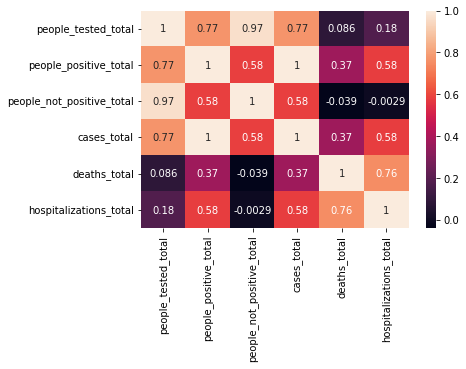

In [29]:
# show heatmap correletion
sns.heatmap(data.corr(), annot=True)

#### By Person


##### Tranform [ y = log(x) ]

In [30]:
# transform data [ y = log(x) ]
data['people_tested_total'] = np.log(data['people_tested_total'])
data['people_positive_total'] = np.log(data['people_positive_total'])
data['people_not_positive_total'] = np.log(data['people_not_positive_total'])
data

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,people_tested_total,people_positive_total,people_not_positive_total,cases_total,deaths_total,hospitalizations_total
0,2020-03-01,0.000000,-inf,0.000000,0,0,2
1,2020-03-02,2.079442,-inf,2.079442,0,0,1
2,2020-03-03,3.433987,-inf,3.433987,0,0,3
3,2020-03-04,3.688879,-inf,3.688879,0,0,2
4,2020-03-05,2.772589,0.000000,2.708050,1,0,6
...,...,...,...,...,...,...,...
428,2021-05-03,8.243283,6.320768,8.085179,553,6,62
429,2021-05-04,8.138273,6.146329,7.991592,466,6,53
430,2021-05-05,8.082711,6.186209,7.920083,483,6,48
431,2021-05-06,8.009031,5.993961,7.865955,402,8,56


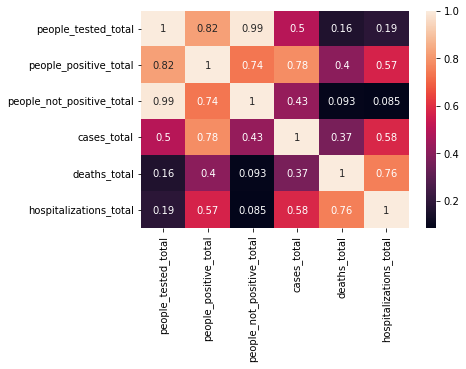

In [31]:
# correletion after transform data [ y = log(x) ]
sns.heatmap(data.corr(), annot=True)

##### Transform [ log(y) = log(x) ]

In [32]:
data['cases_total'] = np.log(data['cases_total'])
data['deaths_total'] = np.log(data['deaths_total'])
data['hospitalizations_total'] = np.log(data['hospitalizations_total'])
data

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,people_tested_total,people_positive_total,people_not_positive_total,cases_total,deaths_total,hospitalizations_total
0,2020-03-01,0.000000,-inf,0.000000,-inf,-inf,0.693147
1,2020-03-02,2.079442,-inf,2.079442,-inf,-inf,0.000000
2,2020-03-03,3.433987,-inf,3.433987,-inf,-inf,1.098612
3,2020-03-04,3.688879,-inf,3.688879,-inf,-inf,0.693147
4,2020-03-05,2.772589,0.000000,2.708050,0.000000,-inf,1.791759
...,...,...,...,...,...,...,...
428,2021-05-03,8.243283,6.320768,8.085179,6.315358,1.791759,4.127134
429,2021-05-04,8.138273,6.146329,7.991592,6.144186,1.791759,3.970292
430,2021-05-05,8.082711,6.186209,7.920083,6.180017,1.791759,3.871201
431,2021-05-06,8.009031,5.993961,7.865955,5.996452,2.079442,4.025352


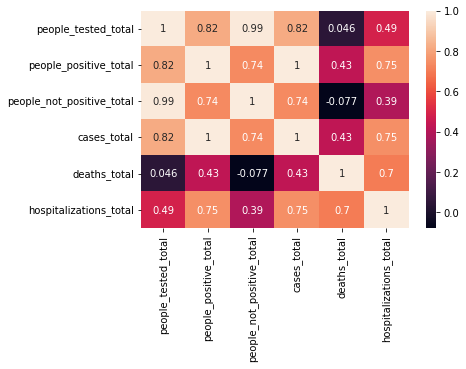

In [33]:
# correletion after transform data [ log(y) = log(x) ]
sns.heatmap(data.corr(), annot=True)

#### By Test

In [34]:
dummyData.corr()

,positive_tests,not_positive_tests,total_tests,cases_total,deaths_total,hospitalizations_total
positive_tests,1.000000,0.387093,0.454794,0.995137,0.421450,0.604349
not_positive_tests,0.387093,1.000000,0.997214,0.362993,-0.224931,-0.132920
total_tests,0.454794,0.997214,1.000000,0.431123,-0.183164,-0.079494
cases_total,0.995137,0.362993,0.431123,1.000000,0.431092,0.632753
deaths_total,0.421450,-0.224931,-0.183164,0.431092,1.000000,0.785727
hospitalizations_total,0.604349,-0.132920,-0.079494,0.632753,0.785727,1.000000


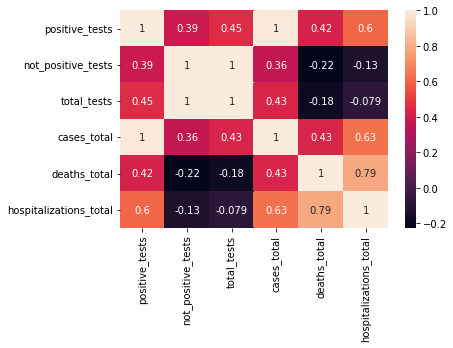

In [35]:
sns.heatmap(dummyData.corr(), annot=True)

##### Transform [ y = log(x) ]

In [36]:
# transform data [ y = log(x) ]
dummyData['total_tests'] = np.log(dummyData['total_tests'])
dummyData['positive_tests'] = np.log(dummyData['positive_tests'])
dummyData['not_positive_tests'] = np.log(dummyData['not_positive_tests'])
dummyData

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,positive_tests,not_positive_tests,total_tests,cases_total,deaths_total,hospitalizations_total
0,2020-03-01,-inf,0.000000,0.000000,0,0,2
1,2020-03-02,-inf,1.609438,1.609438,0,0,1
2,2020-03-03,-inf,2.197225,2.197225,0,0,3
3,2020-03-04,-inf,2.397895,2.397895,0,0,2
4,2020-03-05,0.000000,2.484907,2.564949,1,0,6
...,...,...,...,...,...,...,...
631,2021-11-22,6.816736,10.445143,10.471355,726,2,39
632,2021-11-23,6.722630,10.305078,10.332506,645,0,29
633,2021-11-24,6.715383,9.847340,9.890048,535,0,33
634,2021-11-25,5.459586,8.452335,8.501267,143,0,35


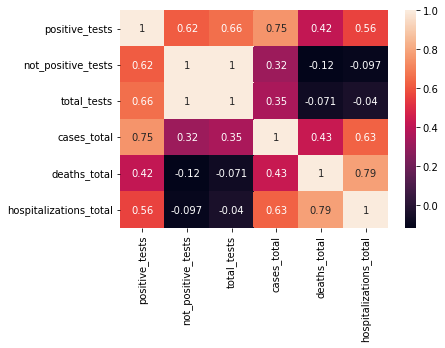

In [37]:
# correletion after transform data [ y = log(x) ]
sns.heatmap(dummyData.corr(), annot=True)

##### Transform [ log(y) = log(x) ]

In [38]:
# Transform data [ log(y) = log(x) ]
dummyData['cases_total'] = np.log(dummyData['cases_total'])
dummyData['deaths_total'] = np.log(dummyData['deaths_total'])
dummyData['hospitalizations_total'] = np.log(dummyData['hospitalizations_total'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
dummyData

,date,positive_tests,not_positive_tests,total_tests,cases_total,deaths_total,hospitalizations_total
0,2020-03-01,-inf,0.000000,0.000000,-inf,-inf,0.693147
1,2020-03-02,-inf,1.609438,1.609438,-inf,-inf,0.000000
2,2020-03-03,-inf,2.197225,2.197225,-inf,-inf,1.098612
3,2020-03-04,-inf,2.397895,2.397895,-inf,-inf,0.693147
4,2020-03-05,0.000000,2.484907,2.564949,0.000000,-inf,1.791759
...,...,...,...,...,...,...,...
631,2021-11-22,6.816736,10.445143,10.471355,6.587550,0.693147,3.663562
632,2021-11-23,6.722630,10.305078,10.332506,6.469250,-inf,3.367296
633,2021-11-24,6.715383,9.847340,9.890048,6.282267,-inf,3.496508
634,2021-11-25,5.459586,8.452335,8.501267,4.962845,-inf,3.555348


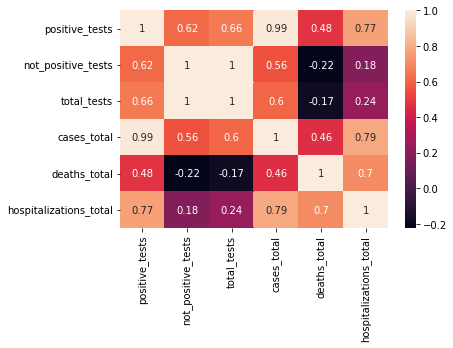

In [40]:
# correletion after transform data [ log(y) = log(x) ]
sns.heatmap(dummyData.corr(), annot=True)